### Test copulas

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

df_load = pd.read_csv("scenario_data/electricload.csv")

# Only 2019
#df_solar = df_solar.iloc[-8760:]
df_load = df_load.drop(columns=["time", "hour", "dayofweek", "month"])
df_load

,AT,BE,BG,CH,CZ,DE,DK,EE,ES,FI,...,NO4,NO5,PL,PT,RO,RS,SE,SI,SK,BA
0,5963.500000,9551.8300,4773.0,7631.87,6063.72,41342.6175,3210.98,792.5,24382.0,8892.9,...,2090.94,2211.13,14727.41,5340.5,6534.0,5286.0,14726.0,1086.87,2860.0,1338.38
1,5726.000000,9152.0225,4585.0,7640.14,5957.57,40135.1425,3100.02,764.7,22734.0,8735.4,...,2078.44,2128.31,13979.46,5123.9,6467.0,4895.0,14485.0,1045.47,2728.0,1288.46
2,5346.800000,8798.7025,4440.0,7391.44,5878.87,39106.0150,2980.39,749.8,21286.0,8626.4,...,2037.06,2147.59,13453.78,4771.1,6552.0,4681.0,14298.0,1004.79,2626.0,1265.84
3,5249.000000,8567.1000,4418.0,7332.57,5827.80,38764.8650,2933.49,746.5,20264.0,8674.1,...,2012.77,2114.13,13306.00,4443.5,6778.0,4650.0,14249.0,983.79,2618.0,1270.68
4,5308.700000,8487.4375,4393.0,7002.08,5730.89,38941.4925,2941.54,754.6,19905.0,8845.3,...,2036.84,2130.82,13175.58,4234.9,7174.0,4772.0,14268.0,998.67,2626.0,1316.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,6736.983333,9368.5400,4760.0,6911.08,6255.85,47492.5550,3785.27,923.0,29362.0,9971.4,...,2398.14,2117.92,16998.24,6788.8,7066.0,5983.0,16704.0,1367.19,3080.0,1523.38
43820,6418.808333,9104.7500,4613.0,6638.85,6191.86,45842.1775,3582.21,891.3,27608.0,10262.0,...,2362.76,2092.09,16239.38,6193.0,6766.0,5623.0,16189.0,1261.46,2986.0,1477.39
43821,6486.633333,9345.8250,4558.0,6412.14,6070.38,45501.1950,3438.26,855.3,25241.0,10191.0,...,2347.66,2039.76,15784.00,5706.9,6564.0,5447.0,15975.0,1192.56,2965.0,1473.25
43822,6194.941667,9391.9250,4410.0,6451.50,5822.73,43968.7125,3309.25,817.7,23911.0,9821.5,...,2308.73,1965.71,15145.93,5484.7,6373.0,5439.0,15416.0,1134.03,2980.0,1442.91


In [3]:
df_load_weighting = df_load.div(df_load.sum(axis=1), axis=0)
df_load_weighting = df_load_weighting.reindex(sorted(df_load_weighting.columns), axis=1)
df_load_weighting

,AT,BA,BE,BG,CH,CZ,DE,DK,EE,ES,...,NO3,NO4,NO5,PL,PT,RO,RS,SE,SI,SK
0,0.018160,0.004076,0.029087,0.014535,0.023240,0.018465,0.125896,0.009778,0.002413,0.074248,...,0.007219,0.006367,0.006733,0.044848,0.016263,0.019897,0.016097,0.044843,0.003310,0.008709
1,0.018013,0.004053,0.028790,0.014423,0.024034,0.018741,0.126256,0.009752,0.002406,0.071516,...,0.007259,0.006538,0.006695,0.043976,0.016119,0.020344,0.015399,0.045566,0.003289,0.008582
2,0.017611,0.004169,0.028981,0.014624,0.024346,0.019364,0.128807,0.009817,0.002470,0.070111,...,0.007486,0.006710,0.007074,0.044314,0.015715,0.021581,0.015418,0.047094,0.003310,0.008649
3,0.017724,0.004291,0.028928,0.014918,0.024760,0.019679,0.130897,0.009905,0.002521,0.068425,...,0.007718,0.006796,0.007139,0.044930,0.015004,0.022887,0.015702,0.048114,0.003322,0.008840
4,0.018010,0.004466,0.028794,0.014903,0.023755,0.019442,0.132111,0.009979,0.002560,0.067529,...,0.007915,0.006910,0.007229,0.044699,0.014367,0.024338,0.016189,0.048405,0.003388,0.008909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,0.018111,0.004095,0.025186,0.012796,0.018579,0.016818,0.127675,0.010176,0.002481,0.078934,...,0.008657,0.006447,0.005694,0.045697,0.018250,0.018996,0.016084,0.044906,0.003675,0.008280
43820,0.018115,0.004170,0.025696,0.013019,0.018736,0.017475,0.129377,0.010110,0.002515,0.077916,...,0.008872,0.006668,0.005904,0.045831,0.017478,0.019095,0.015869,0.045689,0.003560,0.008427
43821,0.018811,0.004272,0.027103,0.013218,0.018595,0.017604,0.131955,0.009971,0.002480,0.073200,...,0.009200,0.006808,0.005915,0.045774,0.016550,0.019036,0.015796,0.046328,0.003458,0.008599
43822,0.018510,0.004311,0.028062,0.013176,0.019276,0.017398,0.131373,0.009888,0.002443,0.071443,...,0.009455,0.006898,0.005873,0.045254,0.016388,0.019042,0.016251,0.046061,0.003388,0.008904


In [4]:
df_load["profile_sum"] = df_load.sum(axis=1)
df_load = df_load[["profile_sum"]]
df_load

,profile_sum
0,328387.258330
1,317887.990830
2,303602.544170
3,296148.600000
4,294764.099170
...,...
43819,371979.518333
43820,354330.212503
43821,344823.786663
43822,334687.065837


In [5]:
df_onshr_wind = pd.read_csv("scenario_data/windonshore.csv")

# Only 2019
#df_onshr_wind = df_onshr_wind.iloc[-8760:]
df_onshr_wind = df_onshr_wind.drop(columns=["time"])
df_onshr_wind = df_onshr_wind.reindex(sorted(df_onshr_wind.columns), axis=1)
df_onshr_wind

,AT,BA,BE,BG,CH,CZ,DE,DK,EE,ES,...,NO3,NO4,NO5,PL,PT,RO,RS,SE,SI,SK
0,0.0899,0.4549,0.1346,0.7241,0.1864,0.1482,0.1566,0.4236,0.1942,0.3538,...,0.6222,0.3292,0.6414,0.2980,0.3523,0.2485,0.1854,0.4379,0.1583,0.0079
1,0.1073,0.4476,0.1372,0.7046,0.1351,0.1484,0.1659,0.4317,0.1930,0.3434,...,0.5848,0.3533,0.6157,0.3126,0.4129,0.2343,0.2104,0.4416,0.1445,0.0021
2,0.1261,0.4375,0.1514,0.6857,0.0966,0.1497,0.1746,0.4420,0.1944,0.3182,...,0.5286,0.3590,0.5853,0.3347,0.4341,0.2108,0.2194,0.4501,0.1322,0.0000
3,0.1247,0.4518,0.1673,0.6459,0.0753,0.1504,0.1745,0.4623,0.2062,0.2894,...,0.4568,0.3632,0.5847,0.3396,0.4157,0.1841,0.2465,0.4440,0.1154,0.0000
4,0.1370,0.4774,0.1865,0.6193,0.0626,0.1550,0.1826,0.5003,0.2228,0.2679,...,0.4228,0.4056,0.6169,0.3402,0.3845,0.1598,0.2762,0.4429,0.1024,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,0.5843,0.0854,0.2557,0.5408,0.0861,0.2784,0.1123,0.2432,0.4108,0.0628,...,0.7766,0.4242,0.6616,0.4311,0.0301,0.4860,0.3705,0.3826,0.1117,0.3454
43820,0.5524,0.1492,0.2186,0.5393,0.1293,0.2704,0.0935,0.2207,0.3752,0.0671,...,0.8158,0.3660,0.6719,0.3836,0.0399,0.4897,0.4057,0.3510,0.1871,0.3387
43821,0.5306,0.1762,0.1743,0.5528,0.1596,0.2636,0.0813,0.2246,0.3965,0.0711,...,0.8575,0.3086,0.7165,0.3418,0.0505,0.4430,0.4427,0.3316,0.1699,0.3440
43822,0.5104,0.1839,0.1387,0.5392,0.1632,0.2456,0.0701,0.2547,0.4355,0.0716,...,0.8954,0.2682,0.7615,0.3030,0.0617,0.3764,0.4746,0.3145,0.1477,0.3375


In [6]:
df_onshr_wind = df_onshr_wind.mul(df_load_weighting, axis=0)
df_onshr_wind["profile_sum"] = df_onshr_wind.sum(axis=1)
df_onshr_wind = df_onshr_wind[["profile_sum"]]
df_onshr_wind

,profile_sum
0,0.315294
1,0.315454
2,0.313204
3,0.309170
4,0.309421
...,...
43819,0.228815
43820,0.221843
43821,0.212105
43822,0.200146


In [7]:
df_solar = pd.read_csv("scenario_data/solar.csv")

# Only 2019
#df_solar = df_solar.iloc[-8760:]
df_solar = df_solar.drop(columns=["time"])
df_solar = df_solar.reindex(sorted(df_solar.columns), axis=1)
df_solar = df_solar.mul(df_load_weighting, axis=0)
df_solar["profile_sum"] = df_solar.sum(axis=1)
df_solar = df_solar[["profile_sum"]]
df_solar

,profile_sum
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
43819,0.0
43820,0.0
43821,0.0
43822,0.0


In [8]:
df_offshr_wind = pd.read_csv("scenario_data/windoffshore.csv")

# Only 2019
#df_solar = df_solar.iloc[-8760:]
df_offshr_wind = df_offshr_wind.drop(columns=["time"])
df_offshr_wind["profile_sum"] = df_offshr_wind.sum(axis=1)
df_offshr_wind = df_offshr_wind[["profile_sum"]]
df_offshr_wind

,profile_sum
0,34.324827
1,34.283233
2,34.098351
3,33.805418
4,33.459486
...,...
43819,19.696610
43820,19.875743
43821,20.098580
43822,21.473808


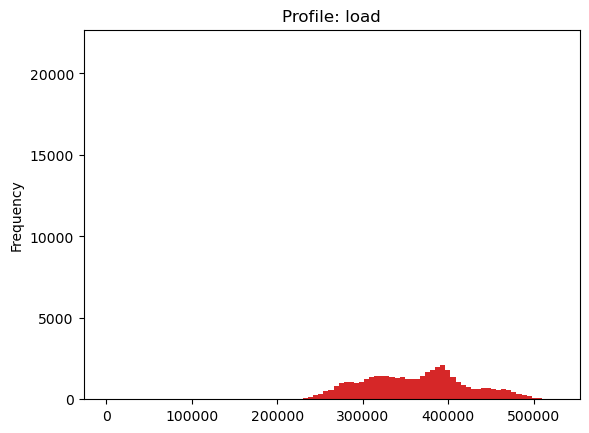

In [9]:
PROFILE_TO_DF = dict({
    "solar": df_solar, 
    "onshr_wind": df_onshr_wind,
    "offshr_wind": df_offshr_wind,
    "load": df_load
})
PROFILES = list(PROFILE_TO_DF.keys())

for profile in PROFILES:
    PROFILE_TO_DF[profile]["profile_sum"].plot.hist(bins=50, title=f"Profile: {profile}")

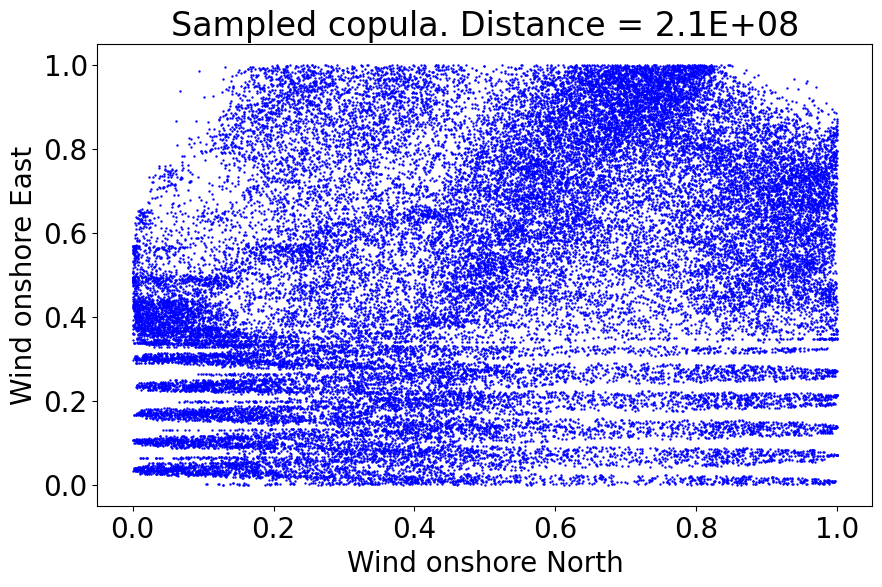

In [23]:
x_profile = PROFILES[3]
y_profile = PROFILES[0]

df_x = PROFILE_TO_DF[x_profile].copy()
df_y = PROFILE_TO_DF[y_profile].copy()

x = df_x[["profile_sum"]].rank(method="first") / len(df_x[["profile_sum"]])
y = df_y[["profile_sum"]].rank(method="first") / len(df_y[["profile_sum"]])

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10,6))
plt.scatter(x, y, color="blue", s=0.5)
plt.xlabel(f"Wind onshore North")
plt.ylabel(f"Wind onshore East")
plt.title(f"Sampled copula. Distance = {212121212:.1E}")
plt.savefig("copula_figs/scale-test", bbox_inches="tight")
plt.show()

/var/folders/rd/zf3y09wj69n3q6493fx5jmtr0000gn/T/ipykernel_17450/3737734164.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cantor = _cantor_pairing_function(x.iloc[i][0], y.iloc[i][0])


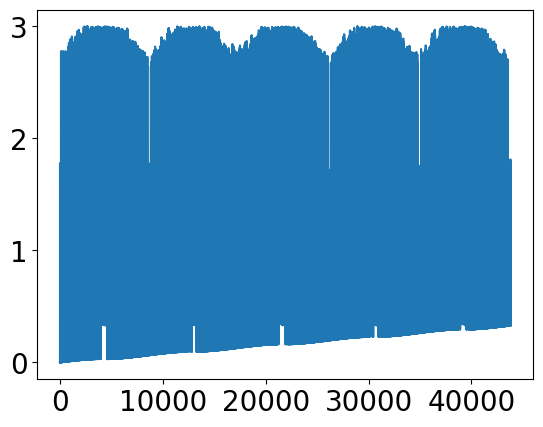

In [24]:
def _cantor_pairing_function(x: int, y: int) -> int:
    # Apply the Cantor pairing function to integer inputs; 2D -> 1D (https://en.wikipedia.org/wiki/Pairing_function)
    return ((x + y) * (x + y + 1)) // 2 + y

_1d_dist = []
for i, row in x.iterrows():
    cantor = _cantor_pairing_function(x.iloc[i][0], y.iloc[i][0])
    _1d_dist.append(cantor)
_1d_dist

plt.plot(_1d_dist)

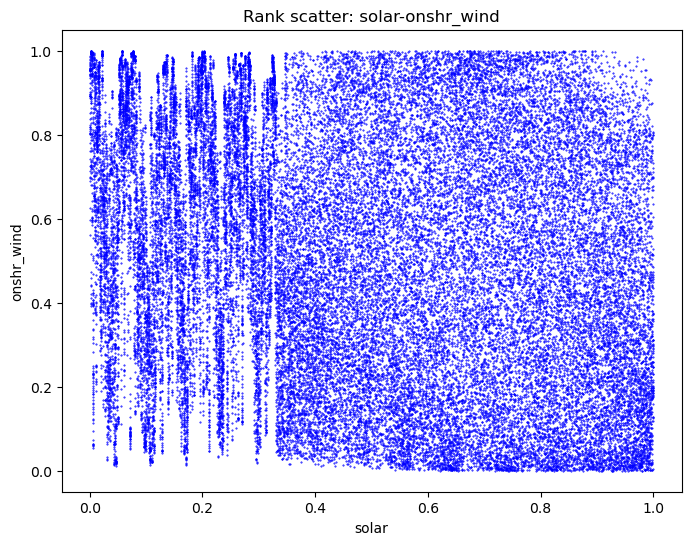

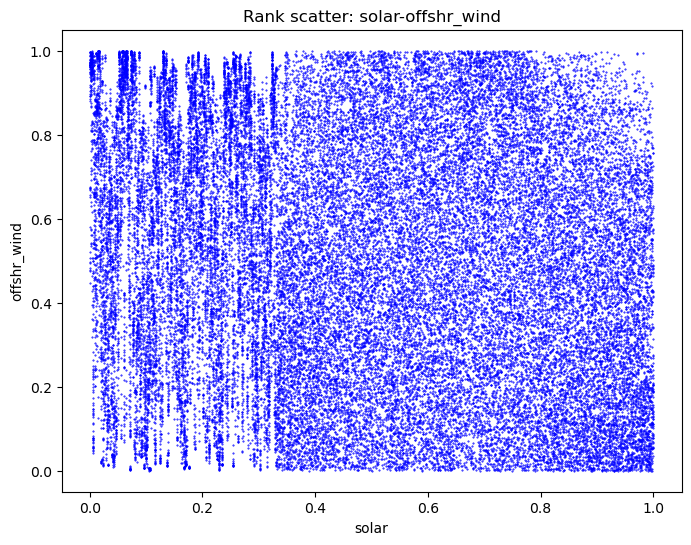

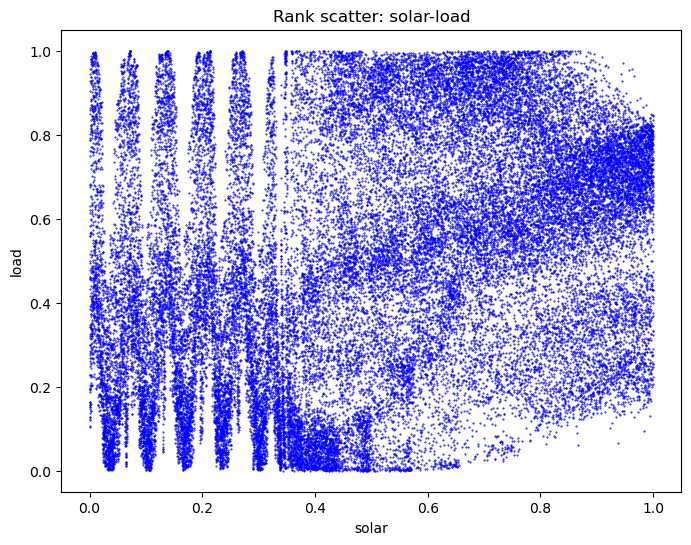

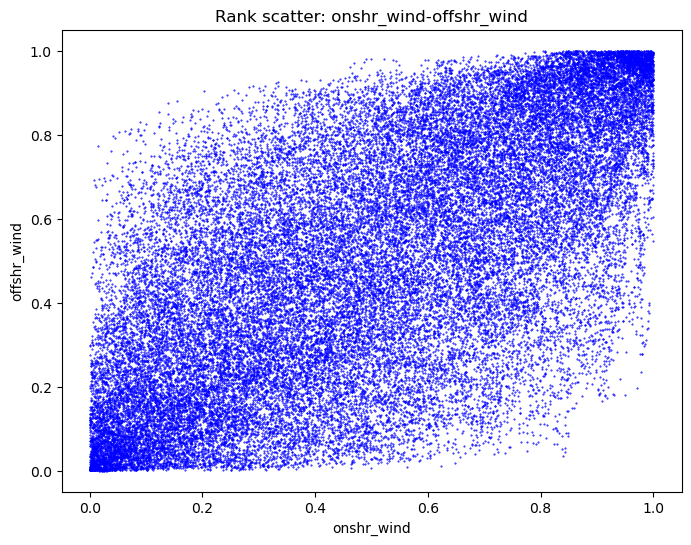

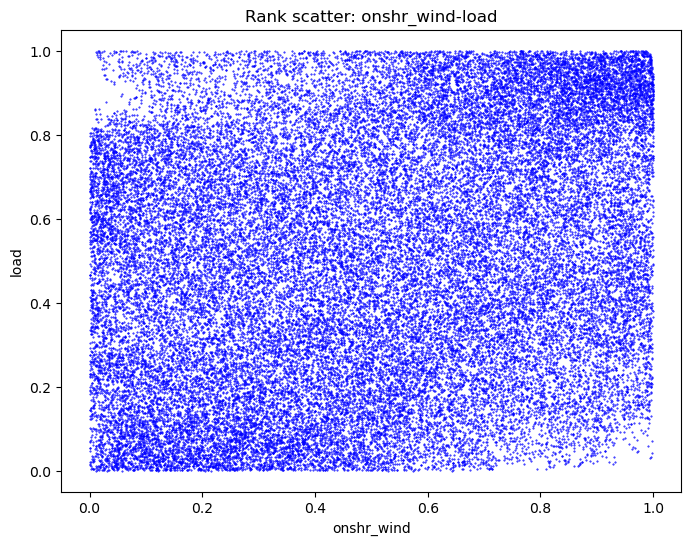

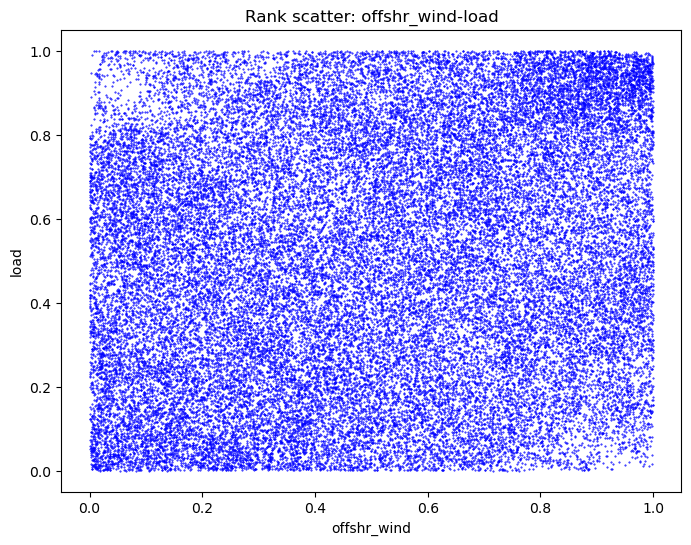

In [55]:
for i in range(0, len(PROFILES)):
    for j in range(i, len(PROFILES)):
        x_profile = PROFILES[i]
        y_profile = PROFILES[j]

        df_x = PROFILE_TO_DF[x_profile].copy()
        df_y = PROFILE_TO_DF[y_profile].copy()

        x = df_x[["profile_sum"]].rank(method="first") / len(df_x[["profile_sum"]])
        y = df_y[["profile_sum"]].rank(method="first") / len(df_y[["profile_sum"]])

        if x_profile != y_profile:
            plt.figure(figsize=(8,6))
            plt.scatter(x, y, color="blue", s=0.2)
            plt.xlabel(f"{x_profile}")
            plt.ylabel(f"{y_profile}")
            plt.title(f"Rank scatter: {x_profile}-{y_profile}")
            plt.show()